# Question 1

### What is your evaluation of the quality of the data?
  * All features other than 'Country name' and 'Life Ladder' have at least some missing values. 'Perceptions of corruption' has the most missing values but even these correspond to less than 10% of the entire dataset.
  
  * Data has varied starting and ending points. Some countries have data starting in later years, while some have data ending earlier than 2023. For some the total range is very small.

## How large is the dataset?
    There are a total of 2199 rows in the dataset.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('DataForTable2.1WHR2023.xls')
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


### What are the features (columns) and how are they represented?
      There are 10 total features in this dataset. Their names and types are as follows:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


## Are there any interesting distributions in the (numeric) features?

* All the features are normally distributed, although most other than 'Life Ladder' exhibit some degree of skewness.
* Perceptions of corruption is the most negatively skewed of all the features. 

In [3]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590


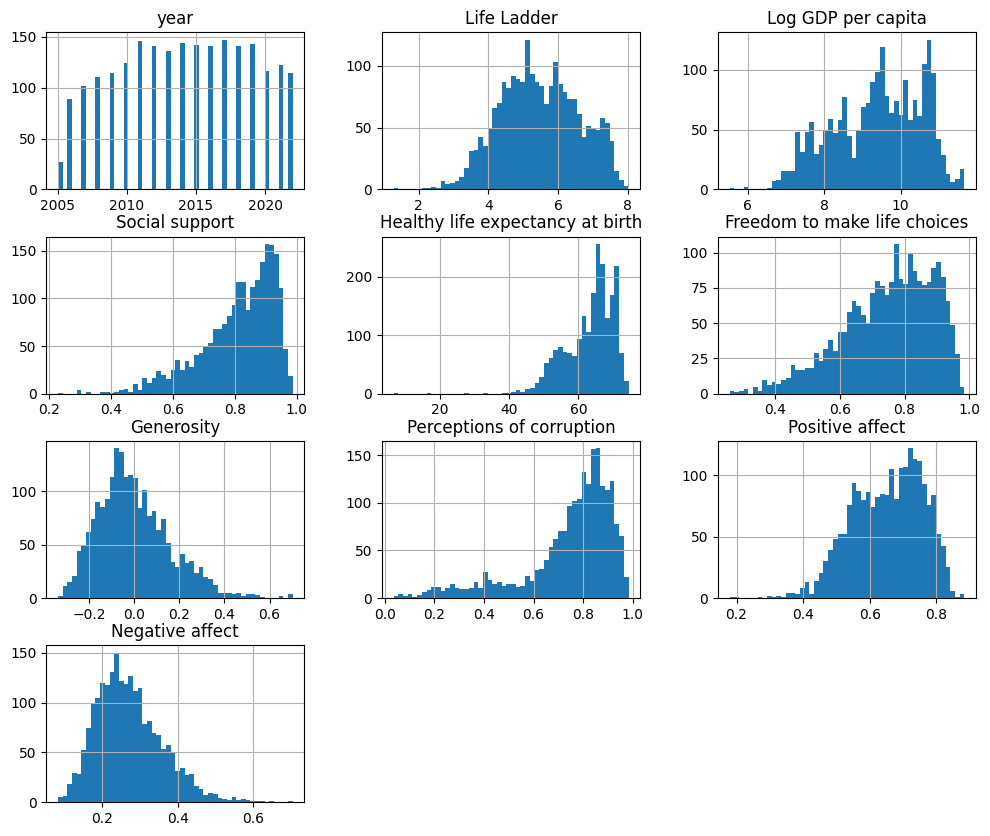

In [4]:
# Generate histograms for all features
df.hist(figsize=(12,10), bins=50)
plt.show()

In [5]:
# Generate a skew table for all numeric features
df.select_dtypes(include=[np.number]).skew()

year                               -0.076683
Life Ladder                        -0.017819
Log GDP per capita                 -0.335130
Social support                     -1.118834
Healthy life expectancy at birth   -1.145454
Freedom to make life choices       -0.670538
Generosity                          0.777087
Perceptions of corruption          -1.490418
Positive affect                    -0.436205
Negative affect                     0.731083
dtype: float64

## Are there any interesting correlations in the data?
* Not surprisingly, GDP per capita, Social Support and Life Expectency are strongly positively correlated with happiness.
* The correlation between GDP per capita and Life expectency is the strongest which is also not very surprising.
* Surprisingly, Generosity is not correlated with GDP per capita which would imply richer countries are not necessarily more generous?

<Axes: >

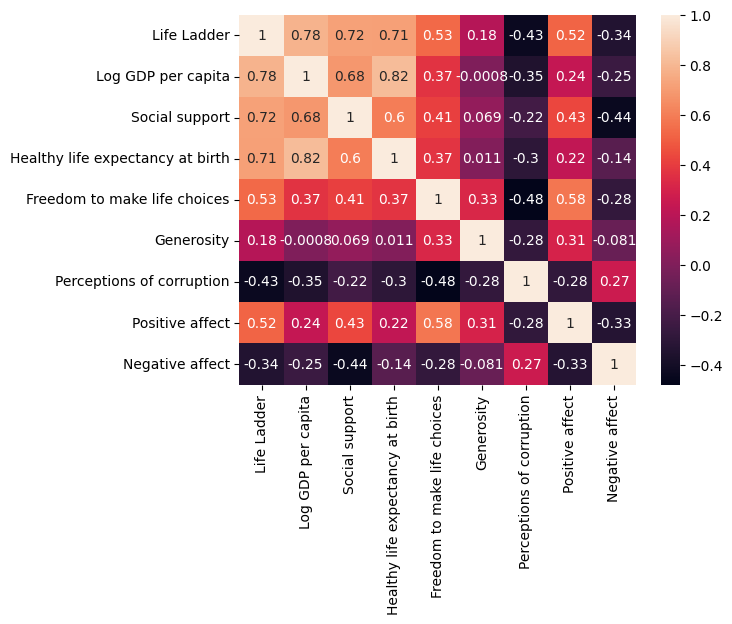

In [6]:
# Generate heatmap for all features except 'Country name' and 'year'
sns.heatmap(df.drop(['Country name', 'year'], axis=1).corr(), annot=True)

## Can you identify any limitations, missing values or distortions of the data?
* Countries do not have the same starting and ending (year) points. This can make our time series analyses to be challenging. It can be hard to detect trends across time such as when we try to find increases or decreases in happiness over time.
* Missing data is mostly randomly missing accross the dataset for all features except for "Perceptions of corruption" which is more likely to be missing for countries with authoritarian regimes. For example, China, Saudi Arabia, UAE are missing almost all data for this feature.

In [7]:
# Count missing values for each feature in the dataset
df.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   20
Social support                       13
Healthy life expectancy at birth     54
Freedom to make life choices         33
Generosity                           73
Perceptions of corruption           116
Positive affect                      24
Negative affect                      16
dtype: int64

In [8]:
# Count missing data and group by country
missing_corruption = df[df["Perceptions of corruption"].isna()].groupby('Country name').size()

# Display in descending showing countries with most missing 'corruption' values
missing_corruption.sort_values(ascending=False).head()

Country name
China                   16
Saudi Arabia            14
United Arab Emirates    12
Jordan                  11
Turkmenistan            10
dtype: int64

## What would you like to see in this dataset?
* This dataset has GDP per capita but no data on how that income is distributed. Data on income distribution would also allow us to find relationships between happiness and equity.
* Most of the features correlate positively with happiness. It would be interesting to see data on crime, drug usage, homelessness, out of school children, and other such features that are 'expected' to correlate negatively with happiness.

# Question 2

## What is the happiest country in 2023? In 2013? Of all time? What is the least happy country in 2023, 2013 and of all time?
* The happiest and least happy countries in 2022 are Finland and Afghanistan respectively.
* The happiest and least happy countries in 2013 are Canada and Syria respectively.

In [9]:
# Filter data for the year 2022 and find the row with the maximum Life Ladder value
df_2022 = df[df['year'] == 2022]
happiest_2022 = df_2022[df_2022['Life Ladder'] == df_2022['Life Ladder'].max()]

# Filter data for the year 2013 and find the row with the maximum Life Ladder value
df_2013 = df[df['year'] == 2013]
happiest_2013 = df_2013[df_2013['Life Ladder'] == df_2013['Life Ladder'].max()]

# Filter data for the year 2022 and find the row with the minumum Life Ladder value
df_2022 = df[df['year'] == 2022]
least_happiest_2022 = df_2022[df_2022['Life Ladder'] == df_2022['Life Ladder'].min()]

# Filter data for the year 2013 and find the row with the minimum Life Ladder value
df_2013 = df[df['year'] == 2013]
least_happiest_2013 = df_2013[df_2013['Life Ladder'] == df_2013['Life Ladder'].min()]

# Concatenate and display all results in a single df
combined_results = pd.concat([happiest_2022, least_happiest_2022, happiest_2013, least_happiest_2013])
combined_results

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
637,Finland,2022,7.728998,10.814193,0.974395,71.224998,0.958609,0.102147,0.190207,0.741323,0.191473
13,Afghanistan,2022,1.281271,NaN,0.228217,54.875000,0.368377,NaN,0.733198,0.205868,0.575512
334,Canada,2013,7.593794,10.751601,0.936239,70.980003,0.916014,0.311748,0.406236,0.800634,0.262850
1883,Syria,2013,2.687553,8.418935,0.585450,59.820000,0.454883,0.221555,0.663431,0.353619,0.622230


### The happiest and least happy countries of all time:
These are Denmark and Afghanistan respectively. This has been computed by taking the average of 'Life Ladder' across all given data for a country and then finding the minimum and maximum of these averaged out values.

In [10]:
# Generate averages across all years for all countries
average_df = df.groupby('Country name').mean()

# Find the countries with the lowest and highest Life Ladder values
all_time_highest_df = average_df[average_df['Life Ladder'] == average_df['Life Ladder'].max()]
all_time_lowest_df = average_df[average_df['Life Ladder'] == average_df['Life Ladder'].min()]

# Concatenate and display all results in a single df
combined_results = pd.concat([all_time_highest_df, all_time_lowest_df])
combined_results

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,,
Denmark,2013.941176,7.673428,10.890561,0.957257,70.110588,0.943526,0.168008,0.198935,0.783842,0.198059
Afghanistan,2014.642857,3.346632,7.585588,0.484381,52.533928,0.498487,0.059799,0.842778,0.433324,0.364459


### This data also makes sense when we take a look at all the other features averaged across time. 
* Denmark ranks higher than 90th percentile for almost all features that correlate positively with happiness.
* For 'Negative affect', Denmark falls in the 13th percentile. Similarly, for corruption Denmark ranks in the bottom 2.5th percentile
* Whereas Afghanistan ranks in the bottom 10th percentile for all features that correlate positively with happiness (except for generosity where it ranks at the 70th percentile.
* For corruption and negative affect, it ranks at 73rd percetile and 88th percentile respectively.


In [11]:
# Calculate the percentile rank for each feature for each country and convert to percentages
percentile_ranks = average_df.rank(pct=True)
percentile_ranks = (percentile_ranks * 100).round(2)

#Print results after removing year and life ladder
print(percentile_ranks.loc['Denmark'].drop(['year', 'Life Ladder']))
print("\n")
print(percentile_ranks.loc['Afghanistan'].drop(['year', 'Life Ladder']))

Log GDP per capita                  93.21
Social support                      98.78
Healthy life expectancy at birth    85.80
Freedom to make life choices        99.39
Generosity                          90.12
Perceptions of corruption            2.50
Positive affect                     93.25
Negative affect                     13.41
Name: Denmark, dtype: float64


Log GDP per capita                   9.88
Social support                       3.05
Healthy life expectancy at birth    11.11
Freedom to make life choices         3.64
Generosity                          69.75
Perceptions of corruption           73.12
Positive affect                      0.61
Negative affect                     88.41
Name: Afghanistan, dtype: float64


# Question 3

## Of the countries in this dataset, which country had the largest increase in happiness from its start of participation to 2023? Which had the largest decrease in happiness?

In [12]:
# Group by country and get the first and last entry for each country
data_first_last = df.groupby('Country name').agg({'year': ['first', 'last'], 'Life Ladder': ['first', 'last']})
data_first_last.columns = ['First Year', 'Last Year', 'Life Ladder First' , 'Life Ladder Last']

# Calculate the percentage increase/decrease from the first available year to the last year
data_first_last['Percentage Increase/Decrease'] = ((data_first_last['Life Ladder Last'] - data_first_last['Life Ladder First']) / data_first_last['Life Ladder First'] * 100).round(2)

# Render results
data_first_last.sort_values("Percentage Increase/Decrease", ascending=False)

,First Year,Last Year,Life Ladder First,Life Ladder Last,Percentage Increase/Decrease
Country name,,,,,
Congo (Brazzaville),2008,2022,3.819792,5.804919,51.97
Georgia,2006,2022,3.675108,5.292755,44.02
Nicaragua,2006,2022,4.460158,6.392258,43.32
Bulgaria,2007,2022,3.843798,5.378349,39.92
Togo,2006,2022,3.202429,4.238982,32.37
...,...,...,...,...,...
Angola,2011,2014,5.589001,3.794838,-32.10
Syria,2008,2015,5.323332,3.461913,-34.97
Zambia,2006,2021,4.824455,3.082155,-36.11


### Highest Increase in Happiness: Congo (Brazzaville)
* It is odd to see that Congo (Brazzaville) has the greatest increase in happiness as it ranks below 50th percentile on most features that explain happiness.
* However, as shown in the charts plotted below, there have been improvements in most variables that correlate positively with happiness (except for GDP per capita).
* Freedom to make choices, generosity, life expectancy and social support have all improved over the years. Perceptions of corruption has also decreased over this time.
* There must be other factors at play here that explain this increase in happiness that are not represented in this data.

In [13]:
print(percentile_ranks.loc['Congo (Brazzaville)'].drop(['year', 'Life Ladder']))

Log GDP per capita                  23.46
Social support                      10.37
Healthy life expectancy at birth    19.14
Freedom to make life choices        38.79
Generosity                          28.40
Perceptions of corruption           44.38
Positive affect                     25.77
Negative affect                     87.80
Name: Congo (Brazzaville), dtype: float64


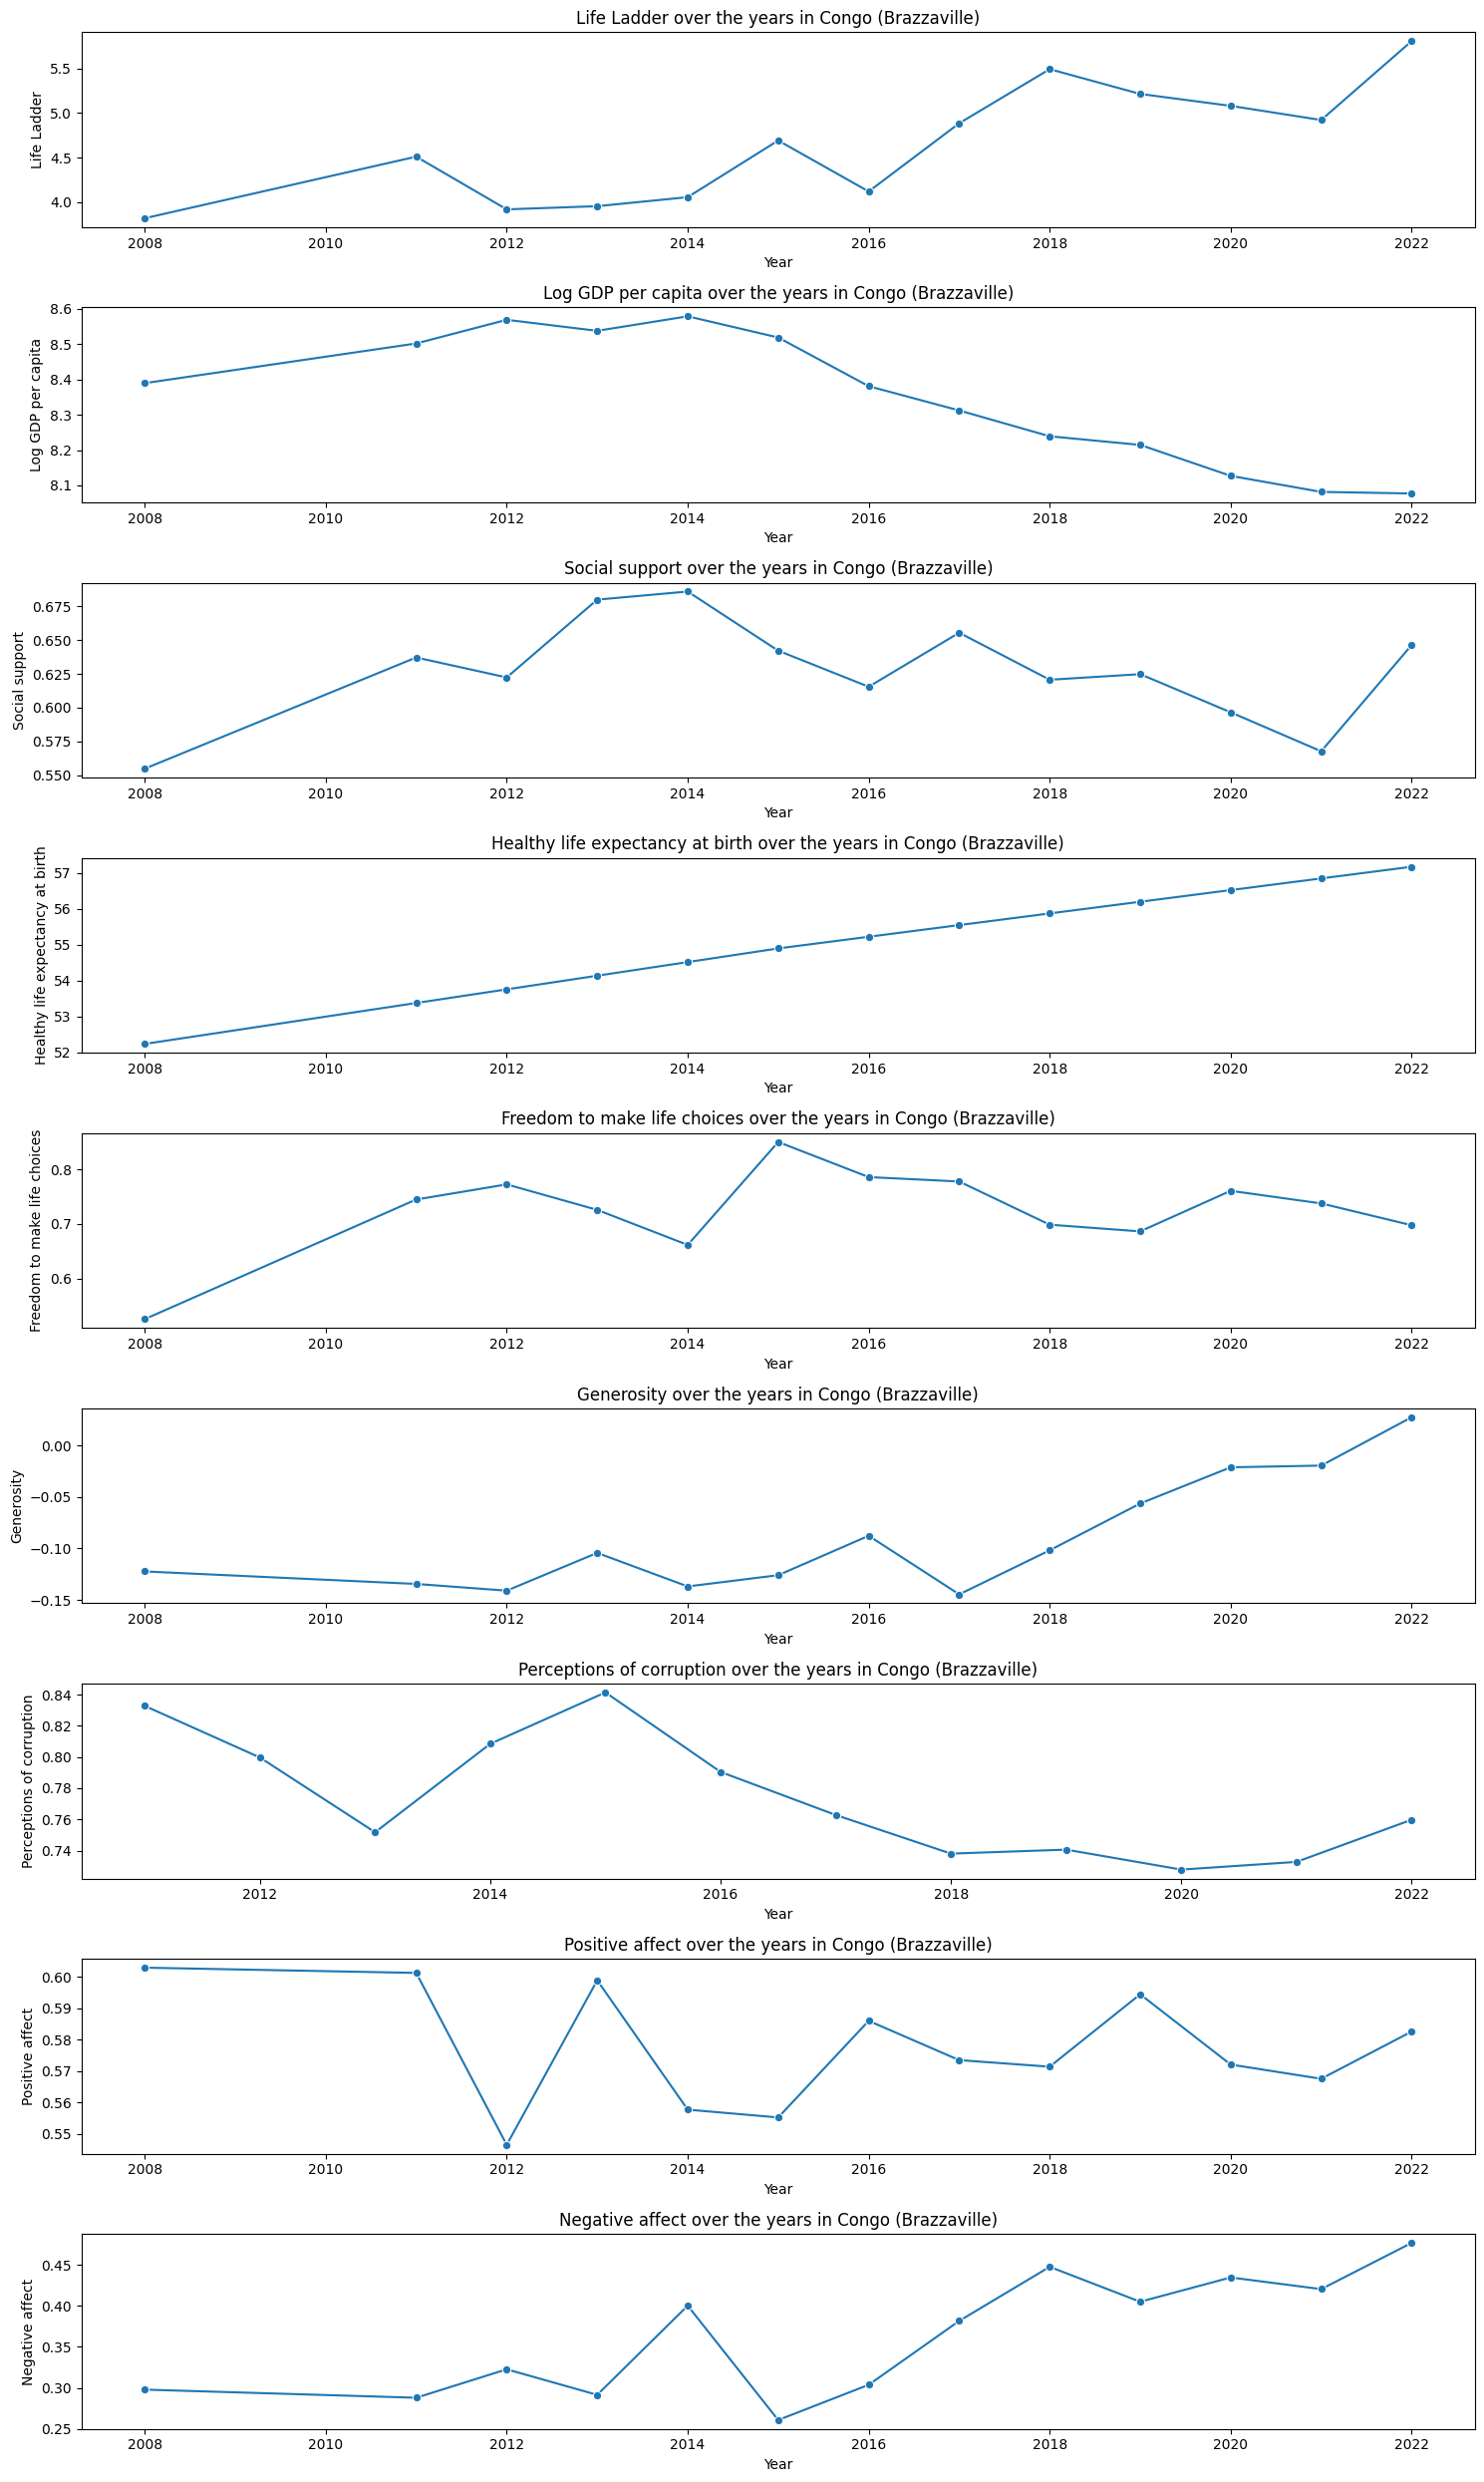

In [14]:
# Filter data for Congo (Brazzaville)
country = "Congo (Brazzaville)"
country_data = df[df["Country name"] == country]
country_data

# Features
variables_to_plot = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']

plt.figure(figsize=(15, 25))

# Create a plot for every feature
for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(len(variables_to_plot), 1, i)
    sns.lineplot(data=country_data, x='year', y=variable, marker='o')
    plt.title(f'{variable} over the years in {country}')
    plt.xlabel('Year')
    plt.ylabel(variable)

# Render charts
plt.tight_layout()
plt.show()

### Highest Decrease in Happiness: Afghanistan
* This is not a surprising result considering how Afghanistan ranks in all features relative to other countries as shown above in Question 2
* Furthermore, Afghanistan is worse off in 2022 on almost every parameter (other than life expectency) compared to 2008.
* These results are to be expected especially when considering the conflict within the country during this time as well.

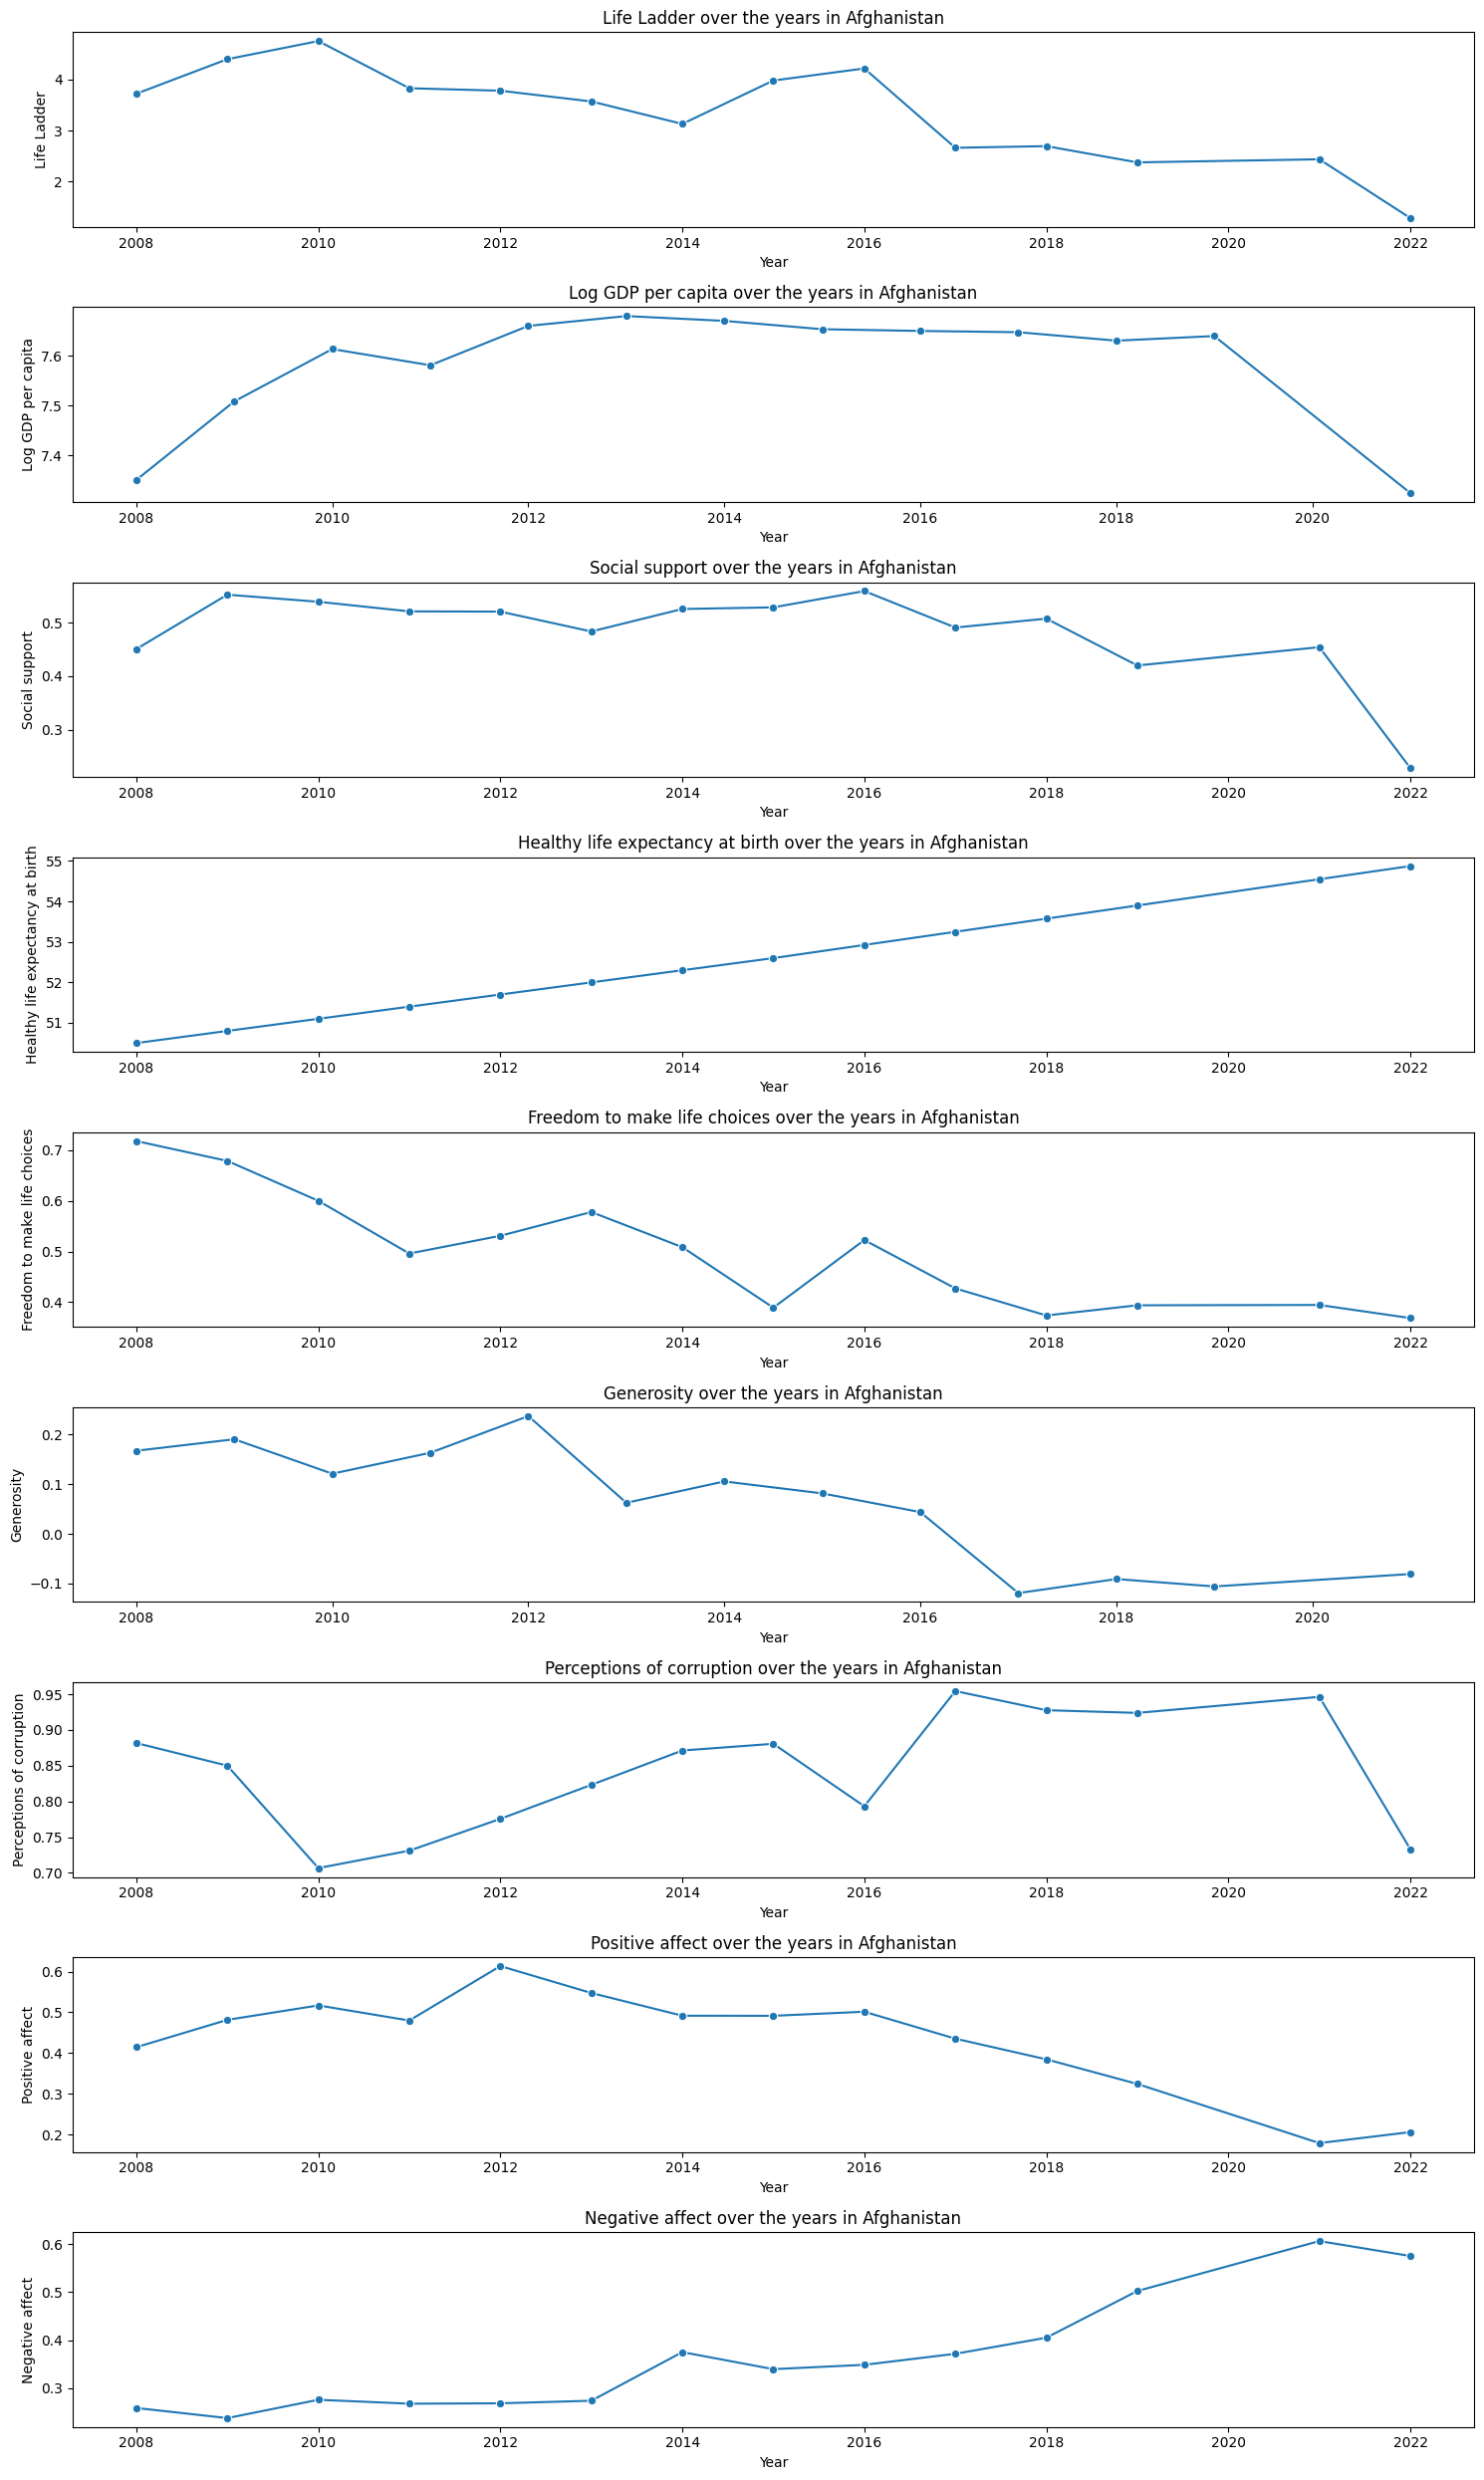

In [15]:
# Filter data for Afghanistan
country = "Afghanistan"
country_data = df[df["Country name"] == country]
plt.figure(figsize=(15, 25))

# Create a plot for every feature
for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(len(variables_to_plot), 1, i)
    sns.lineplot(data=country_data, x='year', y=variable, marker='o')
    plt.title(f'{variable} over the years in {country}')
    plt.xlabel('Year')
    plt.ylabel(variable)

# Render charts
plt.tight_layout()
plt.show()